# Testing the GO term reduncancy reduction pipeline with all transporters from Uniprot

In [45]:
from subpred.util import load_df
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={"figure.figsize": (10, 6)})
pd.set_option("display.max_rows", 500)

Creating the dataset with the broadest possible parameters, to get statistics:

In [46]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

# With organisms other than yeast, it might be interesting to cluster at 100% sequence similarity at the beginning
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=None,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
B7U540,MTAASRANPYSIVSLEEDGLHLVTMSGANGFGNGKVHTRRRCRNRF...,True,1,9606,Inward rectifier potassium channel 18 (Inward ...
O00168,MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGI...,True,1,9606,Phospholemman (FXYD domain-containing ion tran...
O00337,MENDPSRRRESISLTPVAKGLENMGADFLESLEEGQLPRSDLSPAE...,True,1,9606,Sodium/nucleoside cotransporter 1 (Concentrati...
O00400,MSPTISHKDSSRQRRPGNFSHSLDMKSGPLPPGGWDDSHLDSAGRE...,True,1,9606,Acetyl-coenzyme A transporter 1 (AT-1) (Acetyl...
O14925,MEGGGGSGNKTTGGLAGFFGAGGAGYSHADLAGVPLTGMNPLSPYL...,True,1,9606,Mitochondrial import inner membrane translocas...
...,...,...,...,...,...
X5IHB7,MGPLHVPSSSPQHSKLQRVYHLLLFHVHPFWVQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15
X5II77,MGPLHVPSSSPQHSKLQRVYRLLLFHVHPFWIQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15
X5IYJ3,MGPLHVPSSSPQHSKLQRVYHLLLFHVHPFWVQLLYFLFISLFGFL...,False,2,29695,Sodium transporter HKT15


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022829,wide pore channel activity
1,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022803,passive transmembrane transporter activity
2,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0022857,transmembrane transporter activity
3,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0015288,porin activity
4,A0A014M993,enables,GO:0015288,porin activity,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...,...,...
1005409,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0005342,organic acid transmembrane transporter activity
1005410,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0008324,monoatomic cation transmembrane transporter ac...
1005411,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:1901702,salt transmembrane transporter activity
1005412,Z4YKJ7,enables,GO:0015501,glutamate:sodium symporter activity,IEA,F,GO:0042887,amide transmembrane transporter activity


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33582,carbon group molecular entity
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:72695,organic molecule
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36916,cation
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:51151,dipolar compound
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33675,p-block molecular entity
...,...,...,...,...,...,...,...
24979,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:26079,phosphoric acid derivative
24980,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:24870,ion
24981,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:36360,phosphorus oxoacids and derivatives
24982,GO:1905948,"ABC-type 3',5'-cyclic GMP transmembrane transp...",CHEBI:57746,"3',5'-cyclic GMP(1-)",has_primary_input,CHEBI:36357,polyatomic entity


### Analysis

In [47]:
import numpy as np
import pandas as pd
from subpred.cdhit import cd_hit
from subpred.util import load_df
import multiprocessing

from subpred.transmembrane_transporters import get_stats

Generate stats for all of Uniprot

In [48]:
df_stats_uniprot = get_stats(df_sequences, df_uniprot_goa)

cd-hit: clustered .......... sequences into finished clusters at threshold 50
cd-hit: clustered .......... sequences into finished clusters at threshold 70
cd-hit: clustered .......... sequences into finished clusters at threshold 90
cd-hit: clustered .......... sequences into finished clusters at threshold 100


Generate stats for four organisms (ecoli, yeast, human, athaliana):

In [49]:
df_sequences_four = df_sequences[
    df_sequences.organism_id.isin([3702, 9606, 83333, 559292])
]
df_uniprot_goa_four = df_uniprot_goa[
    df_uniprot_goa.Uniprot.isin(df_sequences_four.index)
].reset_index(drop=True)
df_stats_four = get_stats(df_sequences_four, df_uniprot_goa_four)

cd-hit: clustered 5837 sequences into 2230 clusters at threshold 50
cd-hit: clustered 5837 sequences into 2842 clusters at threshold 70
cd-hit: clustered 5837 sequences into 3496 clusters at threshold 90
cd-hit: clustered 5837 sequences into 5226 clusters at threshold 100


Number of transporters, and transport-related GO terms, for all of Uniprot and just the four organisms:

In [50]:
df_stats_four = df_stats_four.rename(
    columns={"n_transporters": "n_transporters_four", "n_terms": "n_terms_four"}
).join(
    df_stats_uniprot.rename(
        columns={"n_transporters": "n_transporters_all", "n_terms": "n_terms_all"}
    )
)[
    ["n_transporters_four", "n_transporters_all", "n_terms_four", "n_terms_all"]
]
df_stats_four

n_transporters_four  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                        
False              False         computational protein_level              50                            1   
                                                                          70                            1   
                                                                          90                            5   
                                                                          100                           9   
                                                                          None                          9   
                                               transcript_level           50                           61   
                                                                          70                           77   
                                                                          90                          145   
                                                                          100                         648   
                                                                          None                        751   
                                 experiment    transcript_level           50                            1   
                                                                          70                            1   
                                                                          90                            1   
                                                                          100                           2   
                                                                          None                          3   
                   True          computational protein_level              50                          188   
                                                                          70                          262   
                                                                          90                          456   
                                                                          100                        1080   
                                                                          None                       1294   
                                               transcript_level           50                           44   
                                                                          70                           65   
                                                                          90                          119   
                                                                          100                         538   
                                                                          None                        789   
                                 experiment    protein_level              50                           24   
                                                                          70                           26   
                                                                          90                           31   
                                                                          100                          34   
                                                                          None                         34   
                                               transcript_level           50                            1   
                                                                          70                            2   
                                                                          90                            3   
                                                                          100                           6   
                                                                          None                          7   
True               True          computational protei

In [51]:
df_stats_four.columns

Index(['n_transporters_four', 'n_transporters_all', 'n_terms_four',
       'n_terms_all'],
      dtype='object')

In [52]:
df_stats_four_paper = df_stats_four.rename(
    columns={
        "n_transporters_four": "Proteins four organisms",
        "n_transporters_all": "Proteins Uniprot",
        "n_terms_four": "Transport GO terms (4 or.)",
        "n_terms_all": "Transport GO terms (Uniprot)",
    }
)

df_stats_four_paper.index = df_stats_four_paper.index.rename(
    names={
        "swissprot_reviewed": "Swissprot reviewed",
        "has_gene_name": "Known gene",
        "go_evidence": "GO evidence",
        "protein_existence_evidence": "Protein evidence",
        "clustering": "Cluster thresh.",
    }
)

In [53]:
new_index = list()
for swissprot_reviewed in [True, False]:
    for known_gene in [True, False]:
        for go_evidence in ["experiment", "computational"]:
            for protein_evidence in ["protein_level", "transcript_level"]:
                for cluster_thresh in [50, 70, 90, 100, "None"]:
                    index_element = (
                        swissprot_reviewed,
                        known_gene,
                        go_evidence,
                        protein_evidence,
                        cluster_thresh,
                    )
                    if index_element in df_stats_four_paper.index:
                        new_index.append(
                            (
                                swissprot_reviewed,
                                known_gene,
                                go_evidence,
                                protein_evidence,
                                cluster_thresh,
                            )
                        )

df_stats_four_paper = df_stats_four_paper.loc[new_index]

In [54]:
df_stats_four_paper_prot = df_stats_four_paper[
    ["Proteins four organisms", "Proteins Uniprot"]
].rename(
    columns={"Proteins four organisms": "Four organisms", "Proteins Uniprot": "Uniprot"}
)
df_stats_four_paper_prot.columns = pd.MultiIndex.from_product(
    [["Proteins"], ["Four organisms", "Uniprot"]]
)
print(
    df_stats_four_paper_prot.to_latex()
    .replace("_", " ")
    .replace("Cluster thresh.", "Cluster thresh.[\%]")
)

\begin{tabular}{lllllrr}
\toprule
 &  &  &  &  & \multicolumn{2}{r}{Proteins} \\
 &  &  &  &  & Four organisms & Uniprot \\
Swissprot reviewed & Known gene & GO evidence & Protein evidence & Cluster thresh.[\%] &  &  \\
\midrule
\multirow[t]{20}{*}{True} & \multirow[t]{20}{*}{True} & \multirow[t]{10}{*}{experiment} & \multirow[t]{5}{*}{protein level} & 50 & 1313 & 1331 \\
 &  &  &  & 70 & 1602 & 1852 \\
 &  &  &  & 90 & 1779 & 2678 \\
 &  &  &  & 100 & 1892 & 3919 \\
 &  &  &  & None & 1915 & 4022 \\
\cline{4-7}
 &  &  & \multirow[t]{5}{*}{transcript level} & 50 & 270 & 449 \\
 &  &  &  & 70 & 384 & 808 \\
 &  &  &  & 90 & 487 & 1385 \\
 &  &  &  & 100 & 521 & 2092 \\
 &  &  &  & None & 532 & 2147 \\
\cline{3-7} \cline{4-7}
 &  & \multirow[t]{10}{*}{computational} & \multirow[t]{5}{*}{protein level} & 50 & 1185 & 1649 \\
 &  &  &  & 70 & 1492 & 2391 \\
 &  &  &  & 90 & 1664 & 3415 \\
 &  &  &  & 100 & 1793 & 4824 \\
 &  &  &  & None & 1821 & 4990 \\
\cline{4-7}
 &  &  & \multirow[t]{5}

In [55]:
df_stats_four_paper_go = df_stats_four_paper[
    ["Transport GO terms (4 or.)", "Transport GO terms (Uniprot)"]
].rename(
    columns={
        "Transport GO terms (4 or.)": "Four organisms",
        "Transport GO terms (Uniprot)": "Uniprot",
    }
)
df_stats_four_paper_go.columns = pd.MultiIndex.from_product(
    [["Transporter GO terms"], ["Four organisms", "Uniprot"]]
)
print(
    df_stats_four_paper_go.to_latex()
    .replace("_", " ")
    .replace("Cluster thresh.", "Cluster thresh.[\%]")
)

\begin{tabular}{lllllrr}
\toprule
 &  &  &  &  & \multicolumn{2}{r}{Transporter GO terms} \\
 &  &  &  &  & Four organisms & Uniprot \\
Swissprot reviewed & Known gene & GO evidence & Protein evidence & Cluster thresh.[\%] &  &  \\
\midrule
\multirow[t]{20}{*}{True} & \multirow[t]{20}{*}{True} & \multirow[t]{10}{*}{experiment} & \multirow[t]{5}{*}{protein level} & 50 & 650 & 581 \\
 &  &  &  & 70 & 679 & 639 \\
 &  &  &  & 90 & 693 & 711 \\
 &  &  &  & 100 & 702 & 746 \\
 &  &  &  & None & 705 & 747 \\
\cline{4-7}
 &  &  & \multirow[t]{5}{*}{transcript level} & 50 & 268 & 349 \\
 &  &  &  & 70 & 300 & 420 \\
 &  &  &  & 90 & 314 & 480 \\
 &  &  &  & 100 & 319 & 540 \\
 &  &  &  & None & 322 & 542 \\
\cline{3-7} \cline{4-7}
 &  & \multirow[t]{10}{*}{computational} & \multirow[t]{5}{*}{protein level} & 50 & 449 & 390 \\
 &  &  &  & 70 & 492 & 462 \\
 &  &  &  & 90 & 499 & 546 \\
 &  &  &  & 100 & 509 & 616 \\
 &  &  &  & None & 509 & 617 \\
\cline{4-7}
 &  &  & \multirow[t]{5}{*}{transcr

We can see that using the strictest parameters (swissprot, experimental data at protein level, gene name is known) gives us plenty of proteins. At 70% clustering, the difference between the four organisms and all organisms is only 250 transporters (1602 and 1852). At 50%, the difference would only be 182 transporters.

Selecting the subset of four organisms allows us to start the analysis directly, without generating four PSSMs for thousands of additional proteins. 

Using the best data, as there are enough samples:

In [56]:
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=[3702, 9606, 83333, 559292],
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

# TODO clustering

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
B7U540,MTAASRANPYSIVSLEEDGLHLVTMSGANGFGNGKVHTRRRCRNRF...,True,1,9606,Inward rectifier potassium channel 18 (Inward ...
O00168,MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGI...,True,1,9606,Phospholemman (FXYD domain-containing ion tran...
O00337,MENDPSRRRESISLTPVAKGLENMGADFLESLEEGQLPRSDLSPAE...,True,1,9606,Sodium/nucleoside cotransporter 1 (Concentrati...
O00400,MSPTISHKDSSRQRRPGNFSHSLDMKSGPLPPGGWDDSHLDSAGRE...,True,1,9606,Acetyl-coenzyme A transporter 1 (AT-1) (Acetyl...
O14925,MEGGGGSGNKTTGGLAGFFGAGGAGYSHADLAGVPLTGMNPLSPYL...,True,1,9606,Mitochondrial import inner membrane translocas...
...,...,...,...,...,...
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C
P39282,MPHTIKKMSLIGLILMIFTSVFGFANSPSAYYLMGYSAIPFYIFSA...,True,1,83333,Inner membrane transporter YjeM
P46996,MSNEDETTRLMSSDEMDYLLETAGINALEEIISQNDSTGINLDTNE...,True,1,559292,Uncharacterized membrane protein YJL163C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015293,symporter activity
1,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0046873,metal ion transmembrane transporter activity
2,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0022853,active monoatomic ion transmembrane transporte...
3,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015103,inorganic anion transmembrane transporter acti...
4,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0008509,monoatomic anion transmembrane transporter act...
...,...,...,...,...,...,...,...,...
51303,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0005315,inorganic phosphate transmembrane transporter ...
51304,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0015318,inorganic molecular entity transmembrane trans...
51305,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0022804,active transmembrane transporter activity
51306,Q9ZWT3,enables,GO:0005315,inorganic phosphate transmembrane transporter ...,ISS,F,GO:0022857,transmembrane transporter activity


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation,chebi_id_ancestor,chebi_term_ancestor
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33582,carbon group molecular entity
1,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:72695,organic molecule
2,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:36916,cation
3,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:51151,dipolar compound
4,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input,CHEBI:33675,p-block molecular entity
...,...,...,...,...,...,...,...
19637,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:36357,polyatomic entity
19638,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33304,chalcogen molecular entity
19639,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:33674,s-block molecular entity
19640,GO:1905201,gibberellin transmembrane transporter activity,CHEBI:24250,gibberellin,has_primary_input,CHEBI:35605,carbon oxoacid


Checking how many proteins had non-standard AA codes:

In [57]:
with open("../data/datasets/proteins_nonstandard_codes.txt", "r") as f:
    proteins_nonstandard_codes = {ac.strip() for ac in f.readlines()}

df_sequences[df_sequences.index.isin(proteins_nonstandard_codes)].shape[0]

0

How many unique GO terms in each organism before clustering?

In [58]:
tmp = (
    df_sequences.reset_index()[["Uniprot", "organism_id"]]
    .merge(df_uniprot_goa[["Uniprot", "go_id_ancestor"]], on="Uniprot", how="inner")
    .groupby("organism_id")
    .agg(set)["go_id_ancestor"]
    .to_dict()
)
from copy import deepcopy

for taxid, go_set in tmp.items():
    go_terms_unique = deepcopy(go_set)
    for taxid2, go_set2 in tmp.items():
        if taxid2 == taxid:
            continue
        go_terms_unique -= deepcopy(go_set2)

    print(taxid, len(go_set), len(go_terms_unique))

3702 274 31
9606 535 210
83333 345 85
559292 278 21


Clustering that dataset at 70%:

In [59]:
from subpred.cdhit import cd_hit

cluster_representatives_70 = cd_hit(df_sequences.sequence, identity_threshold=70)

df_sequences = df_sequences[df_sequences.index.isin(cluster_representatives_70)]

assert (df_sequences.reviewed == True).all()
assert (df_sequences.protein_existence == True).all()

df_uniprot_goa = df_uniprot_goa[
    (df_uniprot_goa.Uniprot.isin(cluster_representatives_70))
].reset_index(drop=True)

assert (df_uniprot_goa.evidence_code != "IEA").all()
assert (df_uniprot_goa.qualifier == "enables").all()

df_go_chebi = df_go_chebi[df_go_chebi.go_id.isin(df_uniprot_goa.go_id_ancestor)]

cd-hit: clustered 1915 sequences into 1740 clusters at threshold 70


## Pipeline code

What are the scores before?

In [60]:
from subpred.go_redundancy import subset_pipeline

# What are the scores before optimization:
subset_before, scores_before = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=10,
    min_coverage=0.9,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=True,
    dataset_name="meta4",
)
scores_before

coverage            1.000000
mean                0.868924
median              0.915944
std                 0.141414
nans             1666.000000
subset_length     137.000000
dtype: float64

137 GO terms, and many pairs (1666) without a ML model. This is caused by a high overlap.

First try with same parameters as yeast:

In [61]:
from subpred.go_redundancy import subset_pipeline, get_go_id_to_proteins
from subpred.go_redundancy import get_go_subset, get_go_id_to_level
from collections import defaultdict
from subpred.util import load_df
import pandas as pd

go_id_to_term = {k: v for k, v in load_df("go_obo").nodes(data="name")}
go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

optimized_subset, scores_after = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=10,
    min_coverage=0.98,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="meta4",
)
display(scores_after)

go_id_to_proteins = get_go_id_to_proteins(df_uniprot_goa=df_uniprot_goa)

pd.DataFrame(
    sorted(
        [
            (go_id_to_term[go_id], len(go_id_to_proteins[go_id]))
            for go_id in optimized_subset
        ]
    )
)

coverage          0.980132
mean              0.830954
median            0.886080
std               0.157762
nans              6.000000
subset_length    32.000000
dtype: float64

,0,1
0,amide transmembrane transporter activity,104
1,antiporter activity,140
2,azole transmembrane transporter activity,22
3,calcium activated cation channel activity,26
4,carbohydrate derivative transmembrane transpor...,104
5,carbohydrate transmembrane transporter activity,138
6,carboxylic acid transmembrane transporter acti...,302
7,efflux transmembrane transporter activity,48
8,inorganic anion transmembrane transporter acti...,156
9,inorganic phosphate transmembrane transporter ...,21


We find a subset of 32 GO terms and 6 NaNs, high coverage and median of 0.88. There are still some relatively generic terms in the datset, like symporter and antiporter. How do these values change across different coverage thresholds, and does it make a difference if we remove the top percentile of GO terms, according to the distribution of annotated proteins?

What is the relationship between coverage, min_unique_samples_per_term and the number of nans? Does the max_samples_percentile have an effect?

In [62]:
from joblib import Parallel, delayed
from sklearn.model_selection import ParameterGrid
from pathlib import Path


def save_params(df_uniprot_goa, df_sequences, **kwargs):
    # wrapper method used for parallelizing evaluation, saves parameters for each iteration
    subset, scores = subset_pipeline(df_uniprot_goa, df_sequences, **kwargs)
    # params = {k:v for k,v in kwargs.items() if }
    return pd.concat([pd.DataFrame.from_dict(kwargs, orient="index"), scores])


CACHE_FILE_NAME = "../data/intermediate/notebooks_cache/df_plot_meta4.pickle"
RETRAIN = not Path(CACHE_FILE_NAME).is_file()

if RETRAIN:
    param_grid = {
        "prefer_abstract_terms": [True, False],
        "min_unique_samples_per_term": [5, 10, 15, 20],
        "min_coverage": [x / 100 for x in reversed(range(1, 101))][:50],
        "max_samples_percentile": [95, 99, 100],
    }

    res = Parallel(n_jobs=-1, backend="multiprocessing")(
        delayed(save_params)(
            df_uniprot_goa=df_uniprot_goa,
            df_sequences=df_sequences,
            min_samples_per_term=20,
            epsilon_f1=0.0,
            nan_value=-1.0,
            verbose=False,
            excluded_terms=None,
            random_seed=1,
            return_scores=True,
            return_baseline_scores=False,
            dataset_name="meta4",
            **parameter_set
        )
        for parameter_set in ParameterGrid(param_grid=param_grid)
    )
    df_plot = pd.concat(res, axis=1).transpose().reset_index(drop=True)
    df_plot.to_pickle(CACHE_FILE_NAME)

else:

    df_plot = pd.read_pickle(CACHE_FILE_NAME)

df_plot.head()

,min_samples_per_term,epsilon_f1,nan_value,verbose,excluded_terms,random_seed,return_scores,return_baseline_scores,dataset_name,max_samples_percentile,min_coverage,min_unique_samples_per_term,prefer_abstract_terms,coverage,mean,median,std,nans,subset_length
0,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,5,True,1.0,0.778971,0.841578,0.189535,2.0,24.0
1,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,5,False,1.0,0.778971,0.841578,0.189535,2.0,24.0
2,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,10,True,1.0,0.777651,0.839036,0.183716,8.0,24.0
3,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,10,False,1.0,0.777651,0.839036,0.183716,8.0,24.0
4,20,0.0,-1.0,False,None,1,True,False,uniprot,99,1.0,15,True,1.0,0.781435,0.841578,0.183659,12.0,24.0


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

palette_lineplots_m = sns.color_palette("flare", n_colors=4)
# sns.set_theme(style='whitegrid')
sns.set_theme()

Plot 1: Coverage vs number of nans vs min unique samples

percentile 95


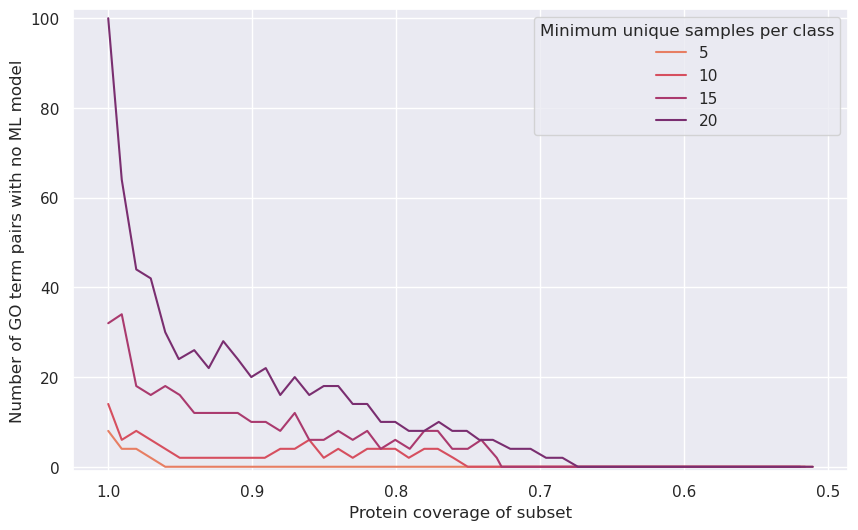

percentile 99


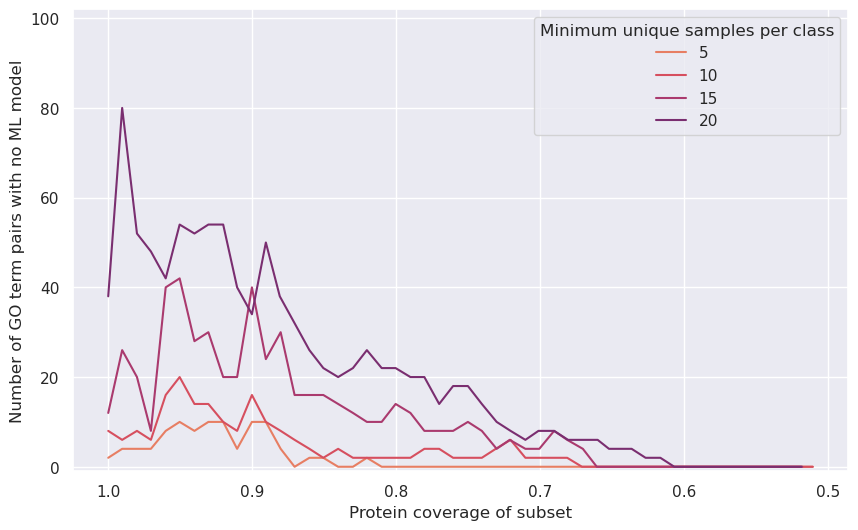

percentile 100


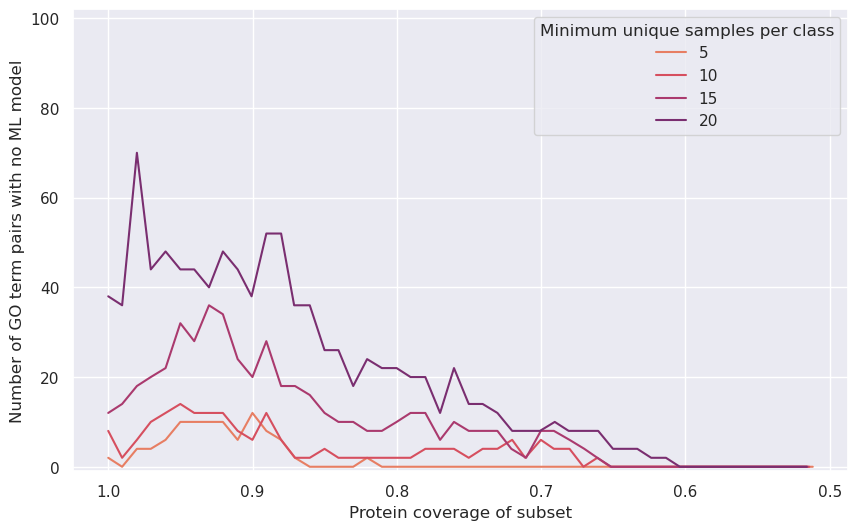

In [93]:
# for prefer_abstract_terms in [True, False]:
for percentile in [95, 99, 100]:
    g = sns.lineplot(
        df_plot[
            (df_plot.prefer_abstract_terms == False)
            & (df_plot.max_samples_percentile == percentile)
        ],
        x="coverage",
        y="nans",
        hue="min_unique_samples_per_term",
        palette=palette_lineplots_m,
    )
    g.invert_xaxis()
    g.set_ylim((-1, df_plot.nans.max() + 2))
    g.set_ylabel("Number of GO term pairs with no ML model")
    g.set_xlabel("Protein coverage of subset")
    # g.set_title(
    #     f"{percentile}th percentile"
    # )
    print("percentile", percentile)
    g.legend(title="Minimum unique samples per class")
    plt.savefig(f"../data/results/nans_meta4_{percentile}.png")
    plt.show()

Coverage vs. mean F1 score

percentile 95


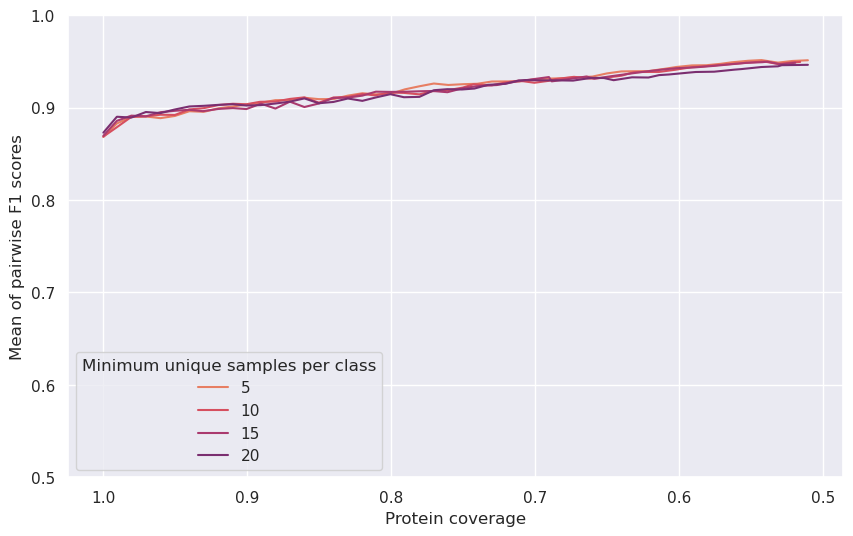

percentile 99


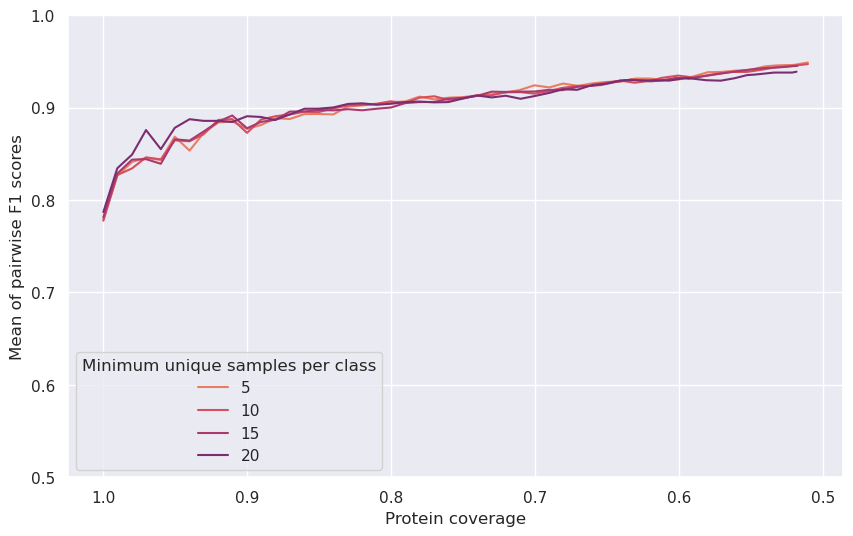

percentile 100


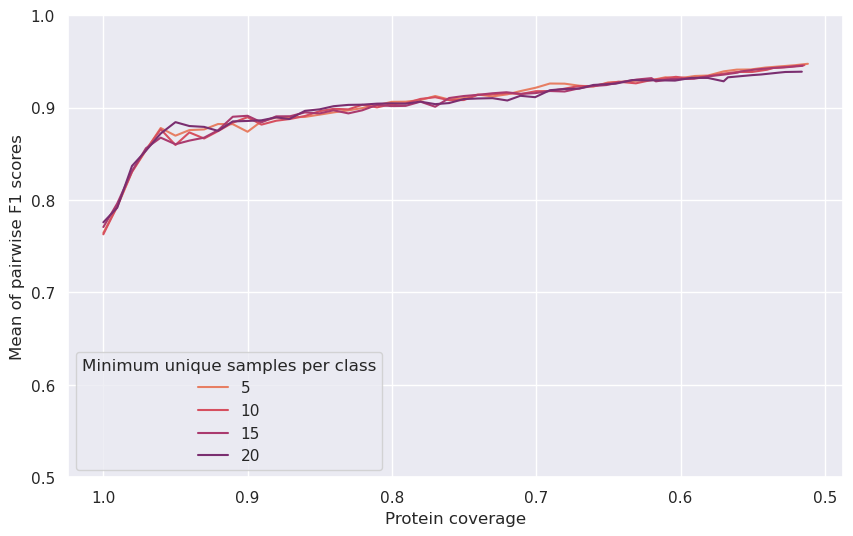

In [94]:
# for prefer_abstract_terms in [True, False]:
for percentile in [95, 99, 100]:
    g = sns.lineplot(
        df_plot[
            (df_plot.prefer_abstract_terms == False)
            & (df_plot.max_samples_percentile == percentile)
        ],
        x="coverage",
        y="mean",
        hue="min_unique_samples_per_term",
        palette=palette_lineplots_m,
    )
    g.invert_xaxis()
    g.set_xlabel("Protein coverage")
    g.set_ylabel("Mean of pairwise F1 scores")
    g.legend(title="Minimum unique samples per class")
    g.set_ylim((0.5, 1))
    print("percentile", percentile)

    # g.set_title(
    #     f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
    # )
    plt.savefig(f"../data/results/mean_meta4_{percentile}.png")

    plt.show()

Coverage vs median f1 score

percentile 95


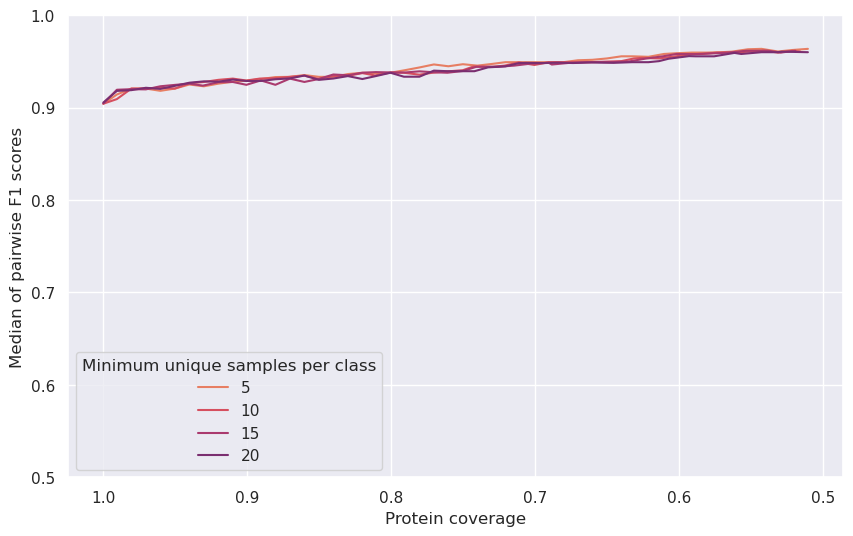

percentile 99


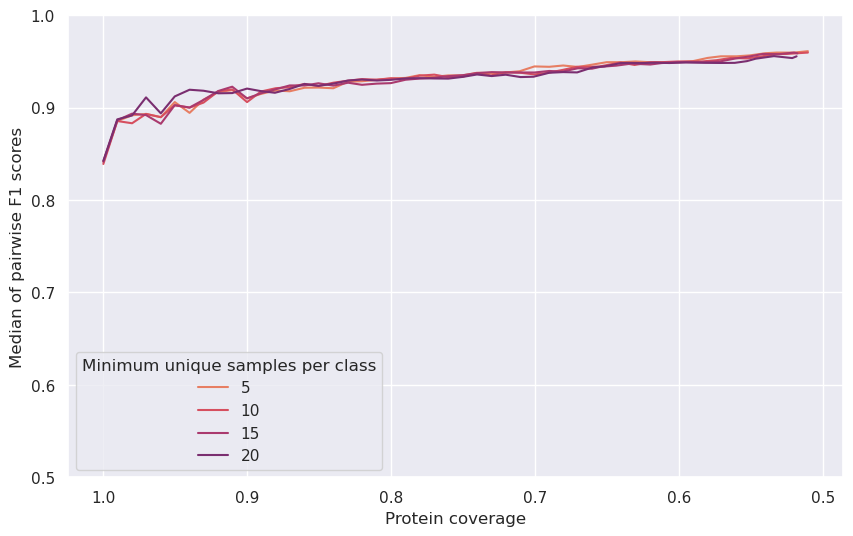

percentile 100


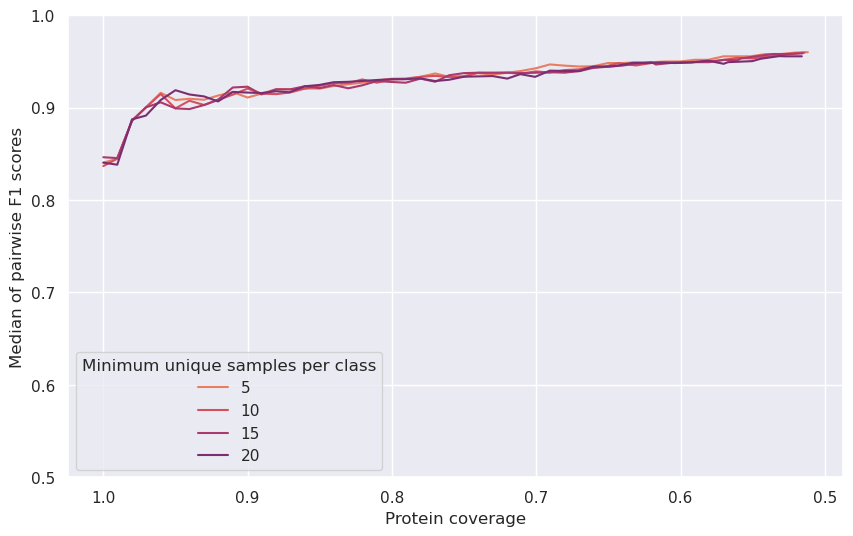

In [95]:
# for prefer_abstract_terms in [True, False]:
for percentile in [95, 99, 100]:
    g = sns.lineplot(
        df_plot[
            (df_plot.prefer_abstract_terms == False)
            & (df_plot.max_samples_percentile == percentile)
        ],
        x="coverage",
        y="median",
        hue="min_unique_samples_per_term",
        palette=palette_lineplots_m,
    )
    g.invert_xaxis()
    g.set_xlabel("Protein coverage")
    g.set_ylabel("Median of pairwise F1 scores")
    g.legend(title="Minimum unique samples per class")
    g.set_ylim((0.5, 1))
    print("percentile", percentile)

    # g.set_title(
    #     f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
    # )
    plt.savefig(f"../data/results/median_meta4_{percentile}.png")

    plt.show()

Coverage vs. subset length vs min_unique_samples

percentile 95


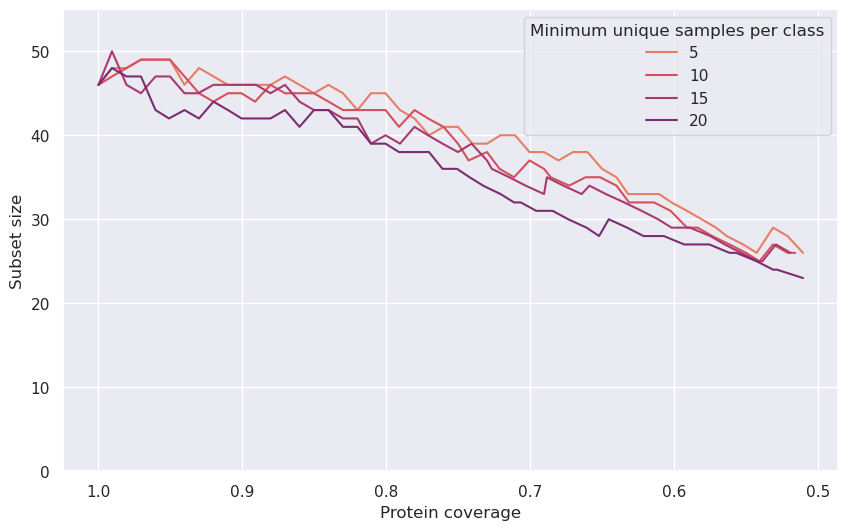

percentile 99


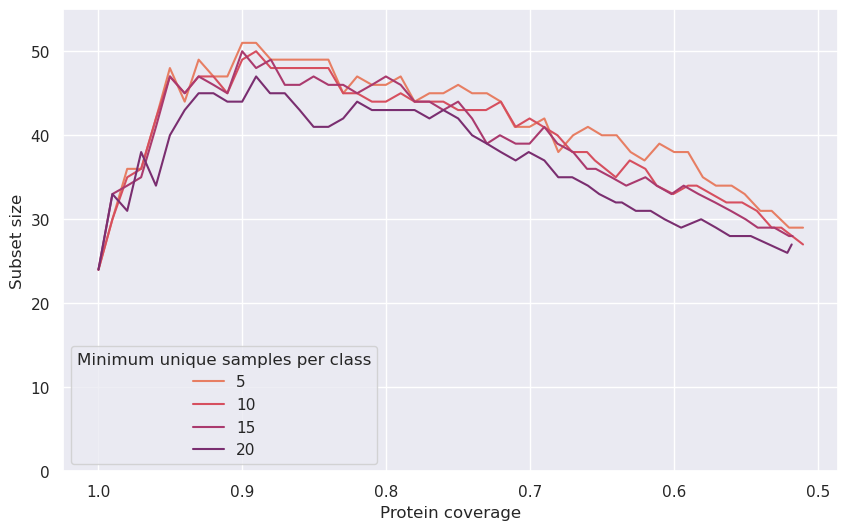

percentile 100


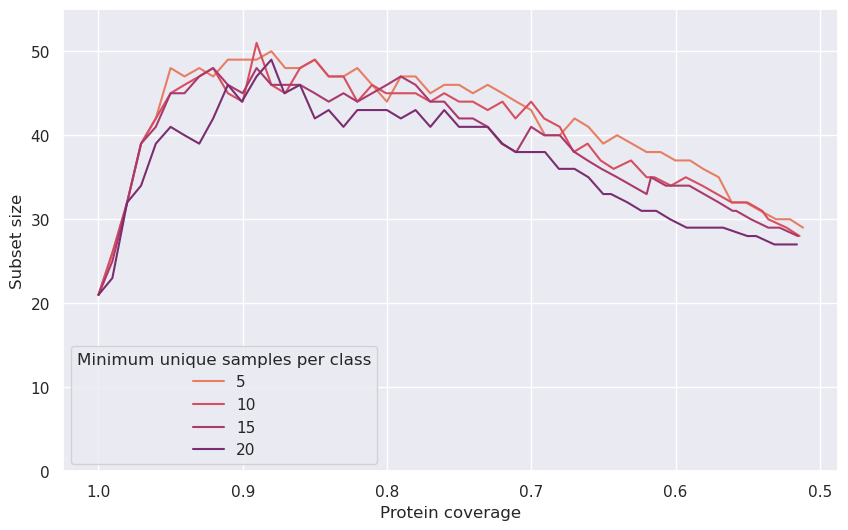

In [96]:
# for prefer_abstract_terms in [True, False]:
for percentile in [95, 99, 100]:
    g = sns.lineplot(
        df_plot[
            (df_plot.prefer_abstract_terms == True)
            & (df_plot.max_samples_percentile == percentile)
        ],
        x="coverage",
        y="subset_length",
        hue="min_unique_samples_per_term",
        palette=palette_lineplots_m,
    )
    g.invert_xaxis()
    g.set_ylim((0, 55))
    g.set_xlabel("Protein coverage")
    g.set_ylabel("Subset size")
    g.legend(title="Minimum unique samples per class")
    print("percentile", percentile)

    # g.set_title(
    #     f"prefer_abstract_terms {prefer_abstract_terms} | percentile {percentile}"
    # )
    plt.savefig(f"../data/results/subset_size_meta4_{percentile}.png")

    plt.show()

At a coverage of 100%, we have few terms as a result (around 20) that are very abstract. This leads to low average F1 scores, and to many pairs with too much overlap to train a ML model (i.e. many NaNs). With lowerering coverage we get more go terms in the subset, the maximum is at 90% coverage at around 45-50 terms. This means we are removing the most abstract terms first, and replace them each with several terms that have fewer proteins. This also improves the average pairwise scores. Only at a coverage of around 50%-60% do we get good F1 scores, along with no NaNs. At less than 90% coverage, the subset sizes become lower again, approaching a length of 25 at 50% coverage. 

We tried to remove the terms with the most samples before applying the pipeline, similar to how we are removing the terms with less than 20 proteins. Instead of removing all GO terms with more than a fixed number of proteins, we looked at the distribution of protein counts across the GO terms, and removed the 1% of GO terms with the most proteins. The 99th percentile was at 454.44 proteins, while the highest number of proteins for any GO term was 815. This approach removed seven GO terms from the dataset. Removing these seven proteins did not have a major impact on the results. The 95th percentile of protein counts was 110.6 proteins, and 35 terms were removed. When removing the 95th percentile of GO terms, we now get good results at higher coverage.

Less than 50 terms when excluding ecoli?

median 4.0
99th percentile: 454.4399999999987
max 815
terms with lower count 688
would remove 7
95th percentile: 110.59999999999991
max 815
terms with lower count 660
would remove 35


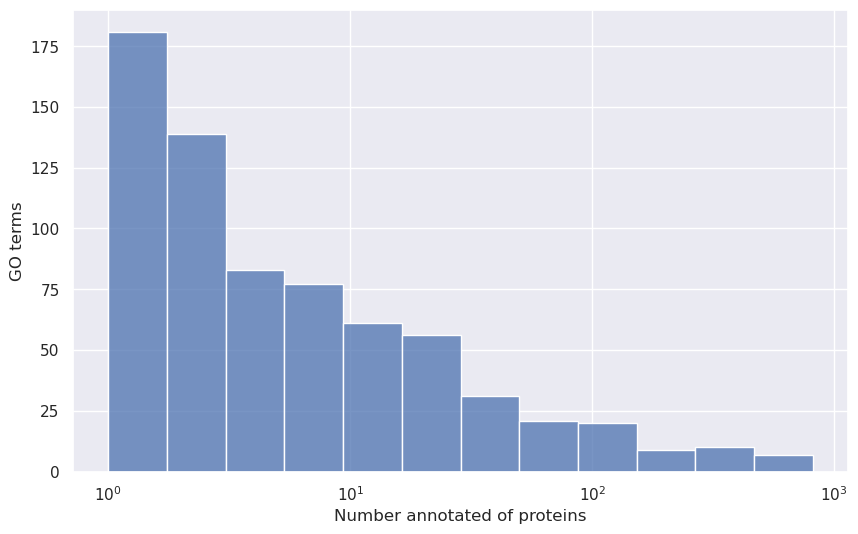

In [97]:
# Removing root node, since all are annotated with that anyway and it gets removed by pipeline
protein_counts = [
    len(proteins)
    for go_id, proteins in go_id_to_proteins.items()
    if go_id != "GO:0022857"
]
print("median", np.median(protein_counts))

print("99th percentile:", np.percentile(protein_counts, 99))
print("max", np.max(protein_counts))
print(
    "terms with lower count",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count <= np.percentile(protein_counts, 99)
        ]
    ),
)
print(
    "would remove",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count > np.percentile(protein_counts, 99)
        ]
    ),
)

print("95th percentile:", np.percentile(protein_counts, 95))
print("max", np.max(protein_counts))
print(
    "terms with lower count",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count <= np.percentile(protein_counts, 95)
        ]
    ),
)
print(
    "would remove",
    len(
        [
            protein_count
            for protein_count in protein_counts
            if protein_count > np.percentile(protein_counts, 95)
        ]
    ),
)

g = sns.histplot(protein_counts, log_scale=True)

g.set_xlabel("Number annotated of proteins")
g.set_ylabel("GO terms")
plt.savefig("../data/results/go_protein_dist_log_meta4.png")
plt.show()

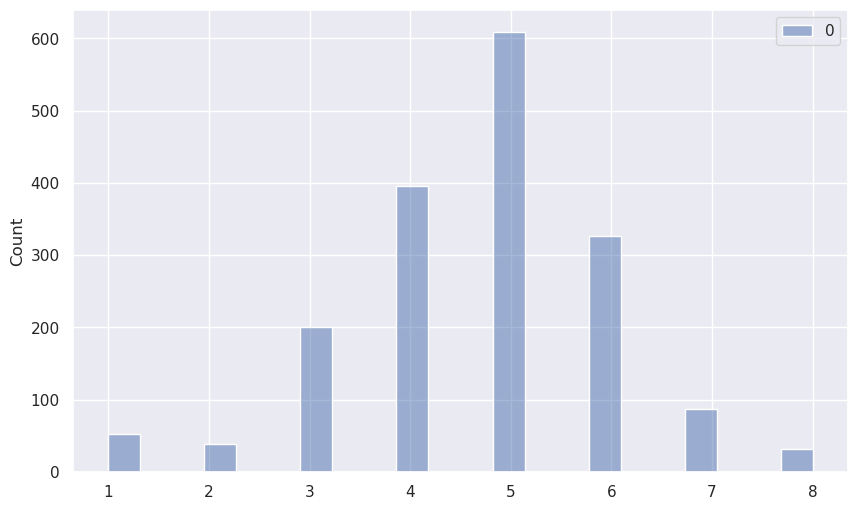

In [99]:
from subpred.go_redundancy import get_go_id_to_level

go_id_to_level = get_go_id_to_level(df_uniprot_goa.go_id_ancestor.unique())
protein_to_go_ids = (
    df_uniprot_goa[["Uniprot", "go_id_ancestor"]]
    .groupby("Uniprot")
    .agg(set)
    .go_id_ancestor.to_dict()
)
protein_to_maxlevel = {
    protein: max({go_id_to_level[go_id] for go_id in go_ids})
    for protein, go_ids in protein_to_go_ids.items()
}
sns.set_theme(rc={"figure.figsize": (10, 6)})
sns.histplot(protein_to_maxlevel.values())
plt.show()

In [78]:
best_subset, scores_best = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=95,
    min_unique_samples_per_term=5,
    min_coverage=0.96,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="meta4",
)
scores_best

coverage          0.960376
mean              0.888620
median            0.918208
std               0.102971
nans              0.000000
subset_length    49.000000
dtype: float64

In [79]:
import numpy as np
from subpred.overlap_matrix import get_go_overlap_matrix, get_overlap_plot

df_go_overlaps = get_go_overlap_matrix(df_uniprot_goa=df_uniprot_goa, exclude_iea=True)

median 0.0
mean 0.02


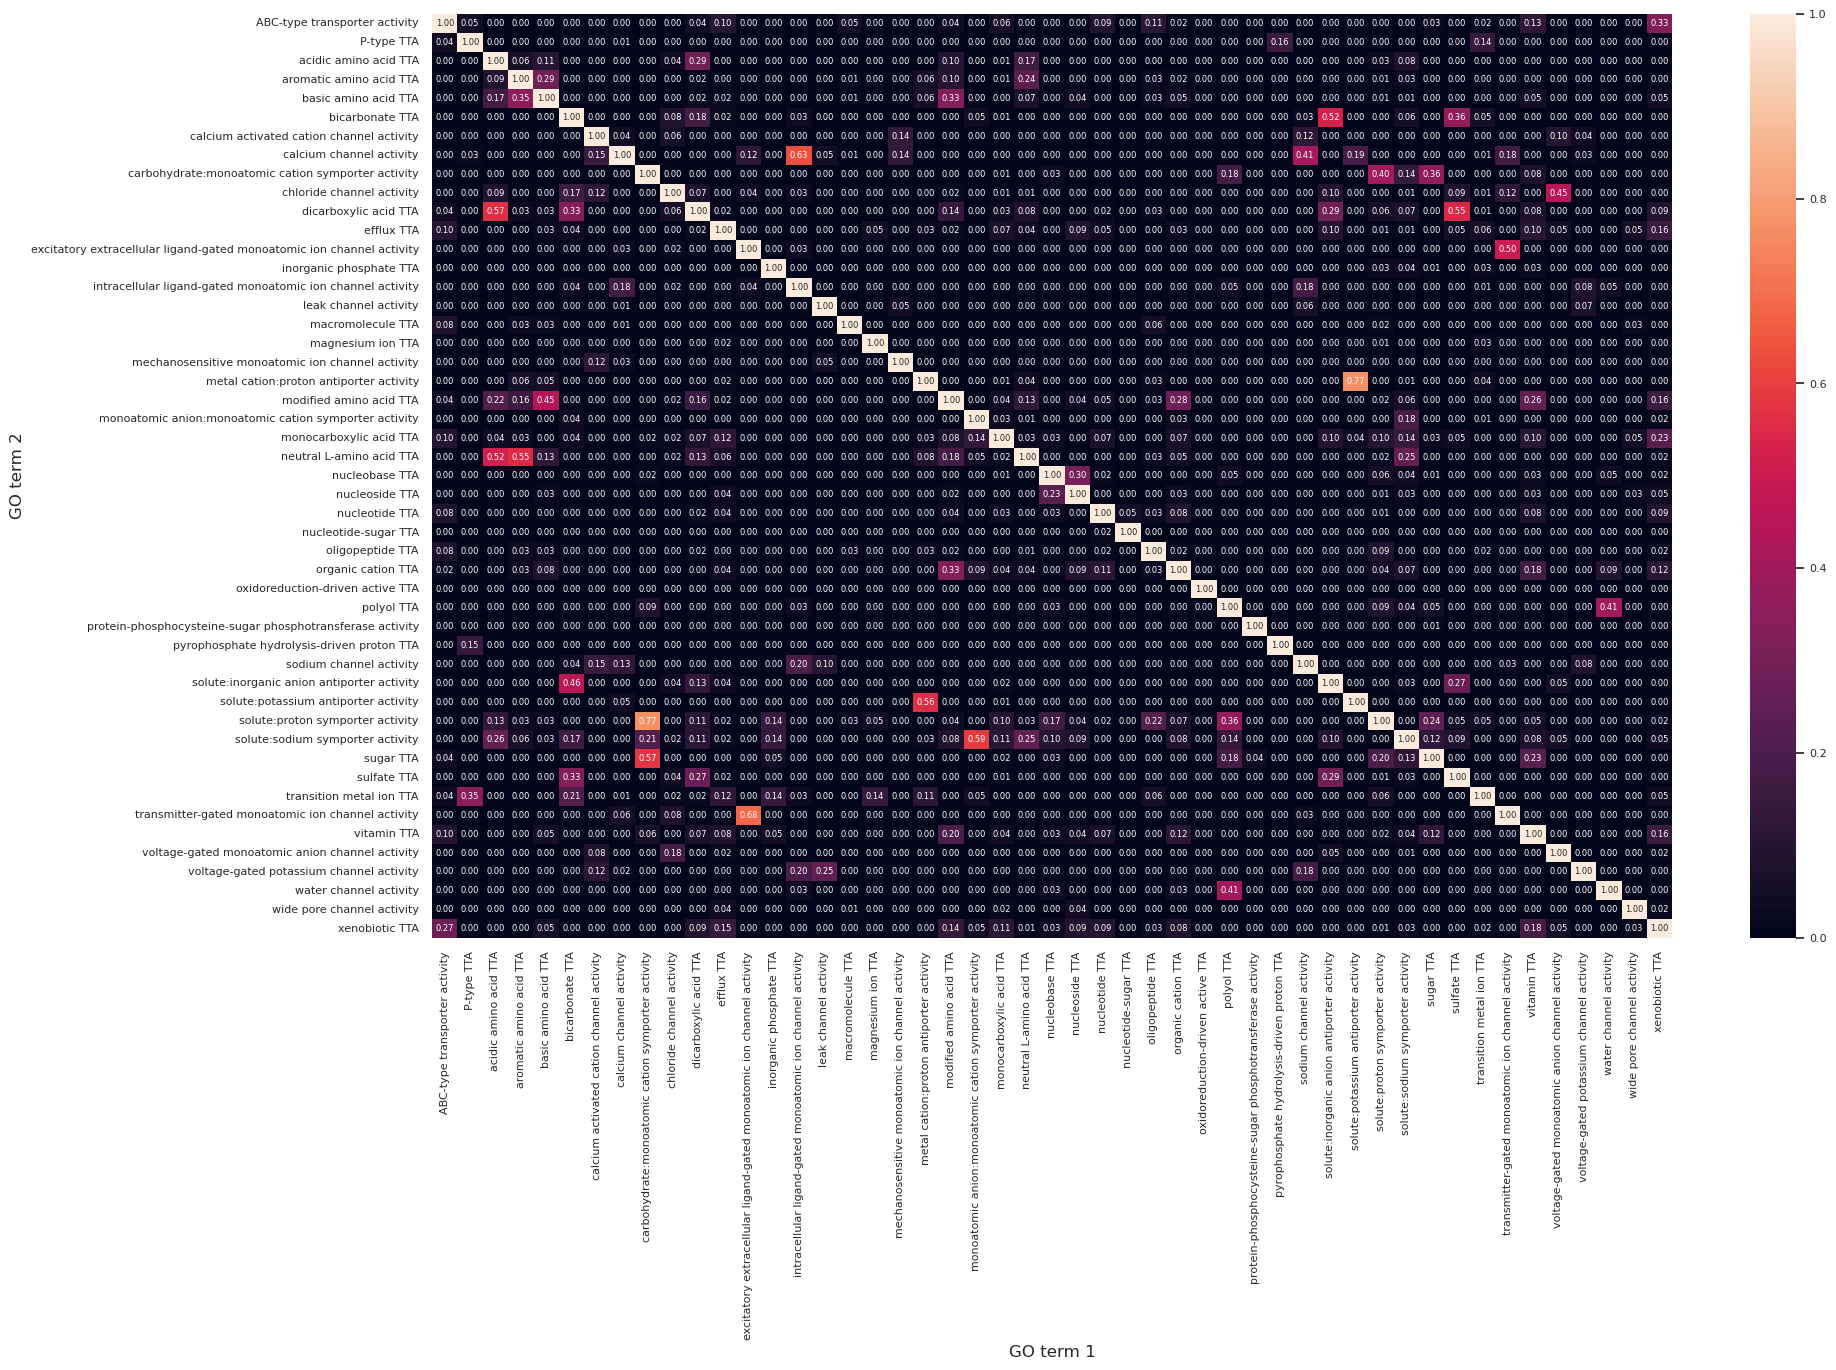

In [80]:
with sns.plotting_context({"font.size": 6, "ytick.labelsize": 8, "xtick.labelsize": 8}):
    plt.figure(figsize=(20, 12))
    get_overlap_plot(
        best_subset,
        df_go_overlaps=df_go_overlaps,
        go_id_to_term=go_id_to_term,
        shorten_labels=True,
        filename="../data/results/overlaps_meta4.png",
    )

### Subset overlaps at 100% percentile max samples

#### 99% coverage

coverage          0.990367
mean              0.792771
median            0.844721
std               0.170199
nans              0.000000
subset_length    26.000000
dtype: float64

median 0.02
mean 0.06


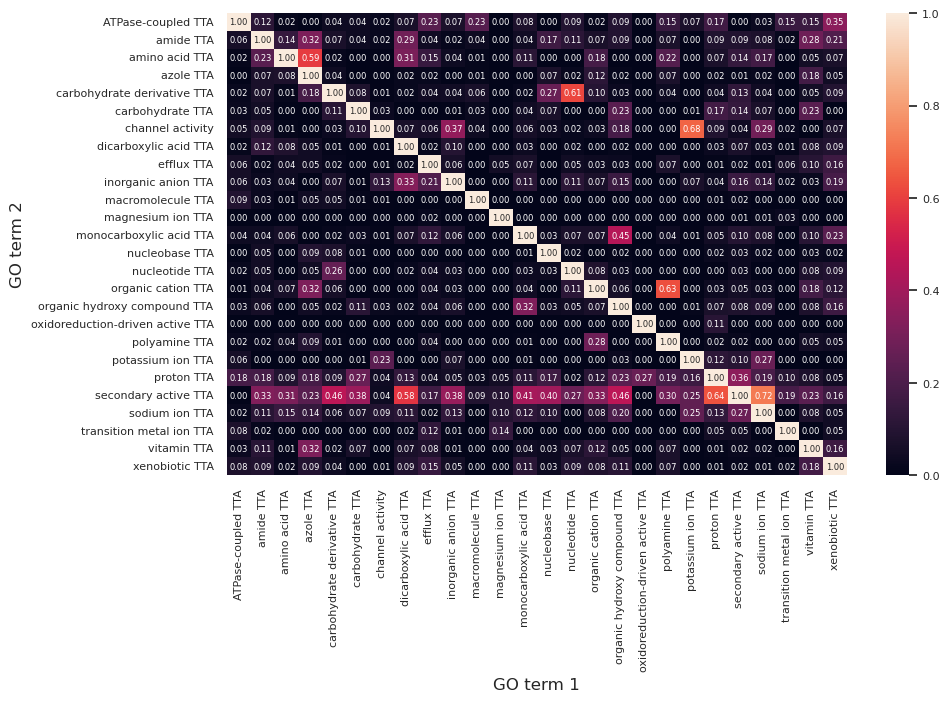

In [26]:
best_subset_100, scores_best_100 = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=5,
    min_coverage=0.99,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="meta4",
)
display(scores_best_100)
with sns.plotting_context({"font.size": 6, "ytick.labelsize": 8, "xtick.labelsize": 8}):
    get_overlap_plot(
        best_subset_100,
        df_go_overlaps=df_go_overlaps,
        go_id_to_term=go_id_to_term,
        shorten_labels=True,
        filename="../data/results/overlaps_meta4_100.png",
    )

#### 60% coverage

here, we can also use m=20

coverage          0.603853
mean              0.929274
median            0.948294
std               0.064448
nans              0.000000
subset_length    30.000000
dtype: float64

median 0.0
mean 0.01


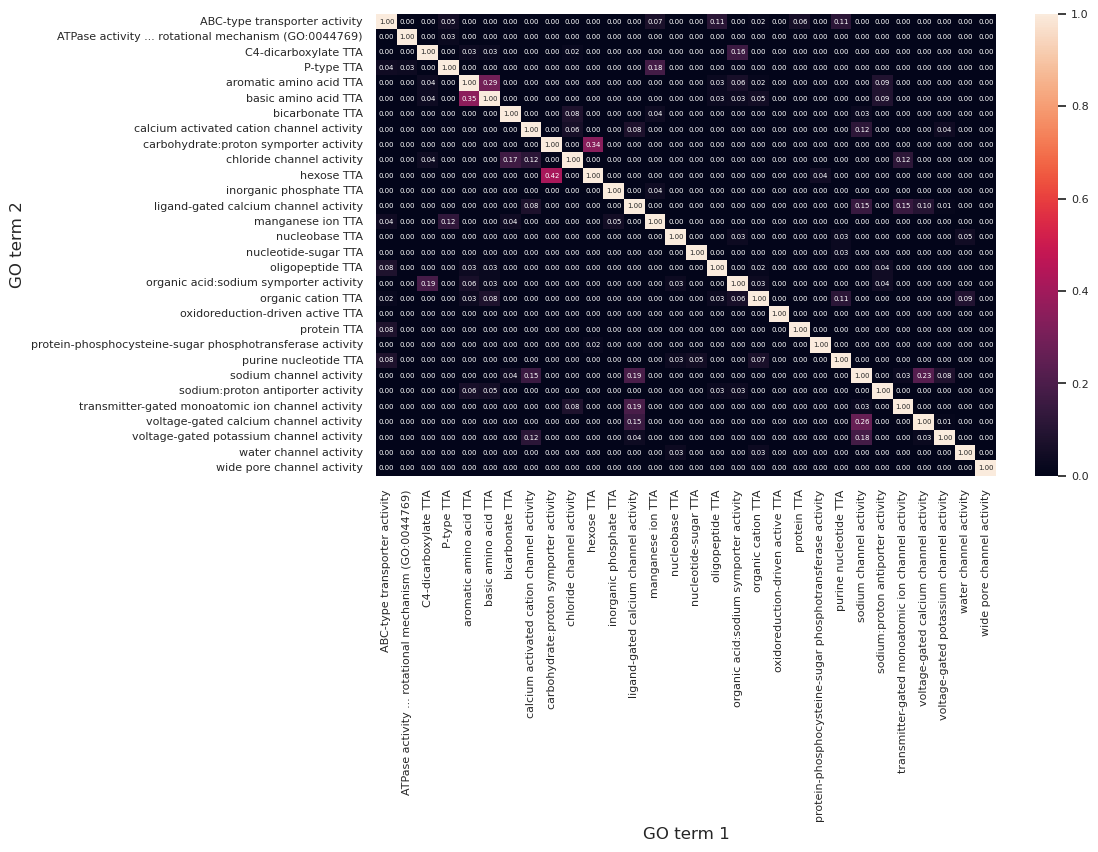

In [27]:
best_subset_100_60, scores_best_100_60 = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=100,
    min_unique_samples_per_term=20,
    min_coverage=0.60,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="meta4",
)
display(scores_best_100_60)
with sns.plotting_context({"font.size": 5, "ytick.labelsize": 8, "xtick.labelsize": 8}):
    get_overlap_plot(
        best_subset_100_60,
        df_go_overlaps=df_go_overlaps,
        go_id_to_term=go_id_to_term,
        shorten_labels=True,
        filename="../data/results/overlaps_meta4_100_60_m20.png",
    )

without 5th percentile

coverage          0.673606
mean              0.929274
median            0.948294
std               0.064448
nans              0.000000
subset_length    30.000000
dtype: float64

median 0.0
mean 0.01


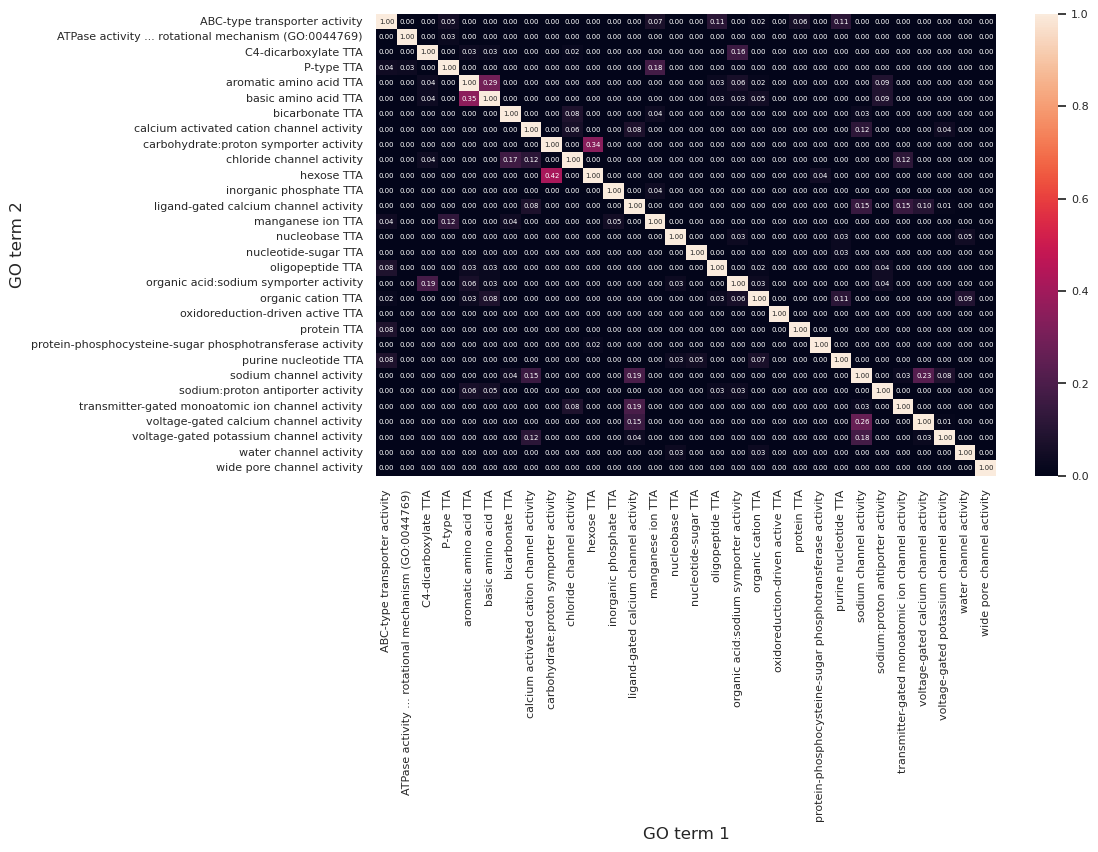

In [28]:
best_subset_95_60, scores_best_95_60 = subset_pipeline(
    df_uniprot_goa,
    df_sequences,
    min_samples_per_term=20,
    max_samples_percentile=95,
    min_unique_samples_per_term=20,
    min_coverage=0.67,
    epsilon_f1=0.0,
    nan_value=-1.0,
    prefer_abstract_terms=False,
    verbose=False,
    excluded_terms=None,
    random_seed=1,
    return_scores=True,
    return_baseline_scores=False,
    dataset_name="meta4",
)
display(scores_best_95_60)
with sns.plotting_context({"font.size": 5, "ytick.labelsize": 8, "xtick.labelsize": 8}):
    get_overlap_plot(
        best_subset_95_60,
        df_go_overlaps=df_go_overlaps,
        go_id_to_term=go_id_to_term,
        shorten_labels=True,
        filename="../data/results/overlaps_meta4_95_67_m20.png",
    )